# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

- A11593945  rer009@ucsd.edu  Ruddy Ramirez
- A13971081  bcvargas@ucsd.edu  Barbara Vargas
- A14263965  jsh065@ucsd.edu  Justin Han




<h1>Introduction/Background</h1>

For years now there has been a stigmatization across various countries and cultures surrounding mental health issues. Often those who suffer from mental disorders, suffer alone due to lack of support and resources that stems from the stigmatization. With the advent of the internet, one would assume having access to online resources and more wide reaching awereness of mental health issues would be beneficial for those in need of help. This led our team to ask,"How has the suicide rate changed over each Generational Group?" We hypothesize that we will see an increase in suicide rates from one Generational group to the next. We predict that there might be upward or downward trends from one group to the next but overall we will see an increase in suicide rates. 

While every life is important, we hope that our data analysis can prove to be important enough to help raise awareness in order to allocate resources to where they need to be if there is a large discrepancy between groups. Or possibly show that there is a growing need for more mental health and suicide prevention resources and initiatives. 

These are the Generational Groups that are part of our data and the birth years they span.

Baby Boomers - 1946 to 1964 :
The Baby Boomers, also known as the Me Generation, are the generation that were born mostly following World War II. There are no precise dates when the cohort birth years start and end. Typically, they range from the early-to-mid 1940s and end from 1960 to 1964. Increased birth rates were observed during the post–World War II baby boom making them a relatively large demographic cohort.

Generational - 1965 to 1980 :
Generation X, commonly abbreviated to Gen X, is the generation following the baby boomers. Demographers and researchers typically use starting birth years ranging from the early-to-mid 1960s and ending birth years in the early 1980s. The term has also been used in different times and places for a number of different subcultures or countercultures since the 1950s.
In the U.S., some called Xers the "baby bust" generation because of a drop in birth rates following the baby boom.  The drop in fertility rates in America began in the late 1950s. But according to authors and demographers William Strauss and Neil Howe (who use a twenty year span from 1961 to 1981 for their birth years), by 1991 there were approximately 88.5 million Xers in the U.S.

Millenials - 1981 to 1996 :
Millennials, also known as Generation Y are the cohort of people following Generation X. There are no precise dates for when this cohort starts or ends; demographers and researchers typically use the early 1980s as starting birth years and the mid 1990s to early 2000s as ending birth years. According to Pew Research, in 2019, the Millennials will surpass the Baby Boomers in size in the U.S., with 72 million Boomers and 73 million Millennials


Generation Z - 1997 to 2012 :
Generation Z is the cohort of people born after the Millennials. Demographers and researchers typically use the mid-1990s to early-2000s as a starting birth years.  There is little consensus regarding ending birth years.




<h1>Data Description</h1>

Our data comes from this dataset found on Kaggle: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

It is a compilation of four other datasets from the United Nations, World Bank and World Health Organization. As the title of the dataset suggets, it covers suicide rates from the years 1985-2016. This data is combined into a single CSV file for us to use. There are 12 distinctive columns in this dataset which makes it very useful dataset to formulate various aspects to answer our question. During our data cleaning process, we decided to drop the Silent and GI generations due to the possibility that they won't be accurately represented since the data starts at 1985.

   First we will need to filter out global values such as gdp_for_year, as it is irrelevant data for our research.  Also we need to perform separate analysis for generation groups as our questions is seeking for the rate change of suicide. After initial structure reorganization, we should be able to run multiple analysis to find visible answer to our question.


<h1>Privacy/Ethics Consideration</h1>

This dataset is open for public use. This compiled dataset were formulated from four other datasets to originally formulate the signals correlated to increased suicide rates across the socio-economic spectrum. It has been released Kaggle public repository, under World Bank Dataset Terms of Use. Our dataset does not have individual level information that can be concerned for privacy issues. We do not anticipate any potentially problematic in terms of data privacy and equitable impact. According to United States Information Privacy Law (https://en.wikipedia.org/wiki/Information_privacy_law), in particular, HIPPA (Health Insurance Portability and Accountability Act), the data privacy violation occurs when a person's 'identifiable' information is shared. We do not have any personally 'identifiable' data in our dataset. This dataset will serve our purpose to validate our hypothesis.
There is a potential bias that this dataset contains multiple countries that fall under “third world categories” that generally have higher rate of suicide that does not necessarily represent generation gaps. Also, because this dataset contains multi- culturally formulated data, there are heavy religion enforced countries that prohibits suicide, that naturally leads lower suicidal rate, regardless of the generation change. We plan to perform random sampling to overcome such biases.


In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as stats

from mpl_toolkits.mplot3d import Axes3D
import requests
import bs4
from bs4 import BeautifulSoup
from pandas.plotting import scatter_matrix

<h1>Data Cleaning/Pre-processing</h1>

### Data Preview

Glipse at our data set before cleaning

In [2]:
#Loads the CSV of Suicide Rates Overview 1985 to 2016

df_rates = pd.read_csv('s-rates.csv') 
df_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Counting rows and columns of this data set to give an idea of how big the data set is. 

print('No. rows: ', df_rates.shape[0])
print('No. cols: ', df_rates.shape[1])

No. rows:  27820
No. cols:  12


### Filter based on Year and Generational Group

Function to filter based on Year and Generational Group. Then sums the "suicides_no" column if the two conditions are met.

In [4]:
#Function to filter based on Year and Generational Group. Then sums the "suicides_no" column if the two conditions are met.
def year_sum(year, gen):
    df_sum = (df_rates[(df_rates.year == year) & (df_rates.generation == gen)])
    return sum(df_sum['suicides_no'])

#Sum of 'suicides_no' column per year for Boomers
b85 = year_sum(1985, 'Boomers')
b86 = year_sum(1986, 'Boomers')
b87 = year_sum(1987, 'Boomers')
b88 = year_sum(1988, 'Boomers')
b89 = year_sum(1989, 'Boomers')
b90 = year_sum(1990, 'Boomers')### Data Preview

#Glipse at our data set before cleaning
b91 = year_sum(1991, 'Boomers')
b92 = year_sum(1992, 'Boomers')
b93 = year_sum(1993, 'Boomers')
b94 = year_sum(1994, 'Boomers')
b95 = year_sum(1995, 'Boomers')
b96 = year_sum(1996, 'Boomers')
b97 = year_sum(1997, 'Boomers')
b98 = year_sum(1998, 'Boomers')
b99 = year_sum(1998, 'Boomers')
b00 = year_sum(2000, 'Boomers')
b01 = year_sum(2001, 'Boomers')
b02 = year_sum(2002, 'Boomers')
b03 = year_sum(2003, 'Boomers')
b04 = year_sum(2004, 'Boomers')
b05 = year_sum(2005, 'Boomers')
b06 = year_sum(2006, 'Boomers')
b07 = year_sum(2007, 'Boomers')
b08 = year_sum(2008, 'Boomers')
b09 = year_sum(2009, 'Boomers')
b10 = year_sum(2010, 'Boomers')
b11 = year_sum(2011, 'Boomers')
b12 = year_sum(2012, 'Boomers')
b13 = year_sum(2013, 'Boomers')
b14 = year_sum(2014, 'Boomers')
b15 = year_sum(2015, 'Boomers')
b16 = year_sum(2016, 'Boomers')

#Sum of 'suicides_no' column per year for Generation X
x85 = year_sum(1985, 'Generation X')
x86 = year_sum(1986, 'Generation X')
x87 = year_sum(1987, 'Generation X')
x88 = year_sum(1988, 'Generation X')
x89 = year_sum(1989, 'Generation X')
x90 = year_sum(1990, 'Generation X')
x91 = year_sum(1991, 'Generation X')
x92 = year_sum(1992, 'Generation X')
x93 = year_sum(1993, 'Generation X')
x94 = year_sum(1994, 'Generation X')
x95 = year_sum(1995, 'Generation X')
x96 = year_sum(1996, 'Generation X')
x97 = year_sum(1997, 'Generation X')
x98 = year_sum(1998, 'Generation X')
x99 = year_sum(1998, 'Generation X')
x00 = year_sum(2000, 'Generation X')
x01 = year_sum(2001, 'Generation X')
x02 = year_sum(2002, 'Generation X')
x03 = year_sum(2003, 'Generation X')
x04 = year_sum(2004, 'Generation X')
x05 = year_sum(2005, 'Generation X')
x06 = year_sum(2006, 'Generation X')
x07 = year_sum(2007, 'Generation X')
x08 = year_sum(2008, 'Generation X')
x09 = year_sum(2009, 'Generation X')
x10 = year_sum(2010, 'Generation X')
x11 = year_sum(2011, 'Generation X')
x12 = year_sum(2012, 'Generation X')
x13 = year_sum(2013, 'Generation X')
x14 = year_sum(2014, 'Generation X')
x15 = year_sum(2015, 'Generation X')
x16 = year_sum(2016, 'Generation X')


#Sum of 'suicides_no' column per year for Millenials
m85 = year_sum(1985, 'Millenials')
m86 = year_sum(1986, 'Millenials')
m87 = year_sum(1987, 'Millenials')
m88 = year_sum(1988, 'Millenials')
m89 = year_sum(1989, 'Millenials')
m90 = year_sum(1990, 'Millenials')
m91 = year_sum(1991, 'Millenials')
m92 = year_sum(1992, 'Millenials')
m93 = year_sum(1993, 'Millenials')
m94 = year_sum(1994, 'Millenials')
m95 = year_sum(1995, 'Millenials')
m96 = year_sum(1996, 'Millenials')
m97 = year_sum(1997, 'Millenials')
m98 = year_sum(1998, 'Millenials')
m99 = year_sum(1998, 'Millenials')
m00 = year_sum(2000, 'Millenials')
m01 = year_sum(2001, 'Millenials')
m02 = year_sum(2002, 'Millenials')
m03 = year_sum(2003, 'Millenials')
m04 = year_sum(2004, 'Millenials')
m05 = year_sum(2005, 'Millenials')
m06 = year_sum(2006, 'Millenials')
m07 = year_sum(2007, 'Millenials')
m08 = year_sum(2008, 'Millenials')
m09 = year_sum(2009, 'Millenials')
m10 = year_sum(2010, 'Millenials')
m11 = year_sum(2011, 'Millenials')
m12 = year_sum(2012, 'Millenials')
m13 = year_sum(2013, 'Millenials')
m14 = year_sum(2014, 'Millenials')
m15 = year_sum(2015, 'Millenials')
m16 = year_sum(2016, 'Millenials')

#Sum of 'suicides_no' column per year for Generation Z
z85 = year_sum(1985, 'Generation Z')
z86 = year_sum(1986, 'Generation Z')
z87 = year_sum(1987, 'Generation Z')
z88 = year_sum(1988, 'Generation Z')
z89 = year_sum(1989, 'Generation Z')
z90 = year_sum(1990, 'Generation Z')
z91 = year_sum(1991, 'Generation Z')
z92 = year_sum(1992, 'Generation Z')
z93 = year_sum(1993, 'Generation Z')
z94 = year_sum(1994, 'Generation Z')
z95 = year_sum(1995, 'Generation Z')
z96 = year_sum(1996, 'Generation Z')
z97 = year_sum(1997, 'Generation Z')
z98 = year_sum(1998, 'Generation Z')
z99 = year_sum(1998, 'Generation Z')
z00 = year_sum(2000, 'Generation Z')
z01 = year_sum(2001, 'Generation Z')
z02 = year_sum(2002, 'Generation Z')
z03 = year_sum(2003, 'Generation Z')
z04 = year_sum(2004, 'Generation Z')
z05 = year_sum(2005, 'Generation Z')
z06 = year_sum(2006, 'Generation Z')
z07 = year_sum(2007, 'Generation Z')
z08 = year_sum(2008, 'Generation Z')
z09 = year_sum(2009, 'Generation Z')
z10 = year_sum(2010, 'Generation Z')
z11 = year_sum(2011, 'Generation Z')
z12 = year_sum(2012, 'Generation Z')
z13 = year_sum(2013, 'Generation Z')
z14 = year_sum(2014, 'Generation Z')
z15 = year_sum(2015, 'Generation Z')
z16 = year_sum(2016, 'Generation Z')

#Used print in order to get the values needed for the graph below.
#print()

<h1>Data Visualization</h1>

### Number of Suice Per Year  and Generational Group

Continuous line graph used to chronological representation of each generational group.  

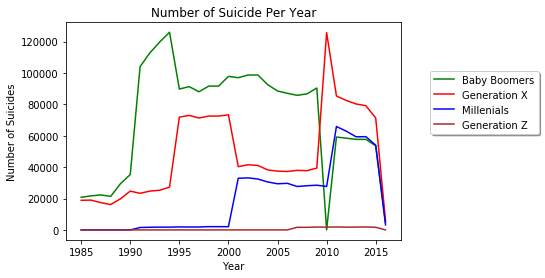

In [5]:
no_boom =[20771, 21685, 22309, 21332, 29427, 35276, 103989, 112809, 119714, 125932, 89752, 91280, 88012, 91627, 91627, 97814, 96998, 98675, 98693, 92531, 88498, 87032, 85749, 86664, 90390,0,  59178, 58443, 57696, 57696, 53588, 4715]
no_x = [18854, 19007, 17367, 16174, 19786, 24725, 23317, 24727, 25262, 27296, 71832, 72958, 71315, 72523, 72523, 73347, 40279, 41536, 41053, 38221, 37442, 37221, 37936, 37756, 39389, 125681, 85345, 82482, 80227, 79132, 71298, 5766]
no_mill = [0, 0, 0, 0, 0, 0, 1533, 1687, 1789, 1760, 1921, 1865, 1880, 2082, 2082, 2065, 32901, 33151, 32431, 30541, 29398, 29692, 27670, 28145, 28487, 27684, 65873, 62905, 59317, 59409, 53959, 3265]
no_z = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 1671, 1640, 1835, 1760, 1879, 1752, 1806, 1882, 1681, 0]

year = [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
plt.plot(year, no_boom, color='g', label = 'Baby Boomers')
plt.plot(year, no_x, color='red', label = 'Generation X')
plt.plot(year, no_mill, color='blue', label = 'Millenials')
plt.plot(year, no_z, color= 'Brown', label = 'Generation Z')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicide Per Year')
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)
plt.rcParams['figure.figsize'] = (6,6)
plt.show()

### Scatter Plot

Most recent years shows higher rate of suicides

0 0 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2E8079DA0>,
      dtype=object)

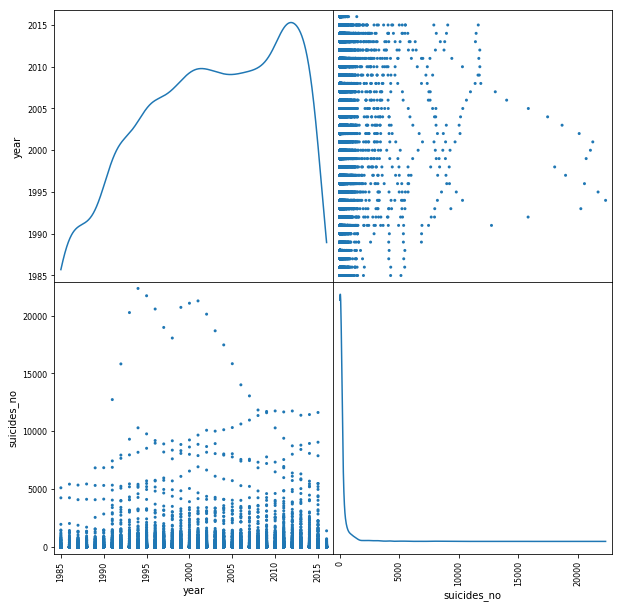

In [6]:
# Scatter Matrix Plot

#Loads the CSV of Suicide Rates Overview 1985 to 2016
df_findingcorrelation = pd.read_csv('s-rates.csv') 

#Drops columns except the columns needed
df_findingcorrelation = df_findingcorrelation.loc[:, ['year','suicides_no','generation']]

#Drop Silent and GI Generation
df_findingcorrelation = df_findingcorrelation[~df_findingcorrelation['generation'].isin(['Silent', 'G.I. Generation'])]

#Check how many missing values are found
n_sui = sum(pd.isnull(df_findingcorrelation['suicides_no']))
n_gen = sum(pd.isnull(df_findingcorrelation['generation']))
n_year = sum(pd.isnull(df_findingcorrelation['year']))

#print(n_sui, n_gen, n_year, n_sex)
print(n_sui, n_gen, n_year)

scatter_matrix(df_findingcorrelation, alpha=1, figsize=(10, 10), diagonal='kde')

### Correlational Possibilty

Between four factors of the data set (year, sex, suicdies_no, generation), here is the illustration of corrleation possibilities. 

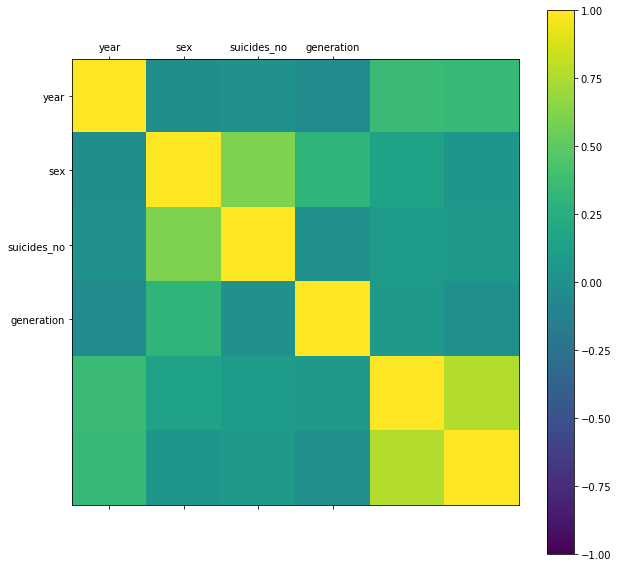

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


In [7]:
# Correlation Matrix Overall

# Define correlations and columns
correlations_all = df_rates.corr()
columns_all = ['year', 'sex', 'suicides_no', 'generation']

# Plot the correlation matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
cax = ax.matshow(correlations_all, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns_all)
ax.set_yticklabels(columns_all)
plt.show()
correlations_all

### Color map showing distribution of suicidal number movement across time

Towards more recent years, millenials are showing higher distribution of suicidal number recorded. 

In [8]:
#Loads the CSV of Suicide Rates Overview 1985 to 2016
df_area = pd.read_csv('s-rates.csv') 

#Drops columns except the columns needed
df_area = df_area.loc[:, ['year','suicides_no','generation']]

#Drop Silent and GI Generation
df_area = df_area[~df_area['generation'].isin(['Silent', 'G.I. Generation'])]

#Check how many missing values are found
n_sui = sum(pd.isnull(df_area['suicides_no']))
n_gen = sum(pd.isnull(df_area['generation']))
n_year = sum(pd.isnull(df_area['year']))

#print(n_sui, n_gen, n_year, n_sex)
print(n_sui, n_gen, n_year)


0 0 0


<Figure size 720x576 with 0 Axes>

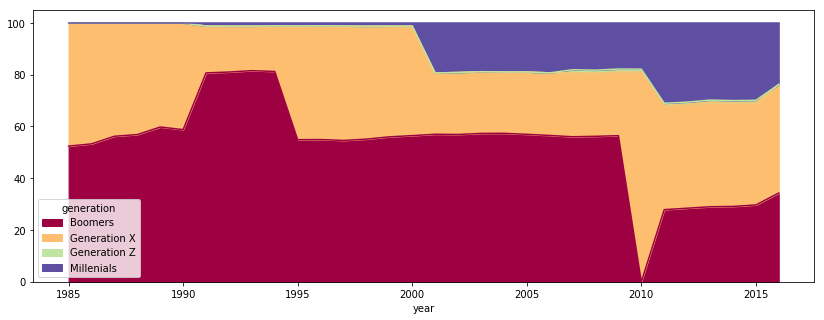

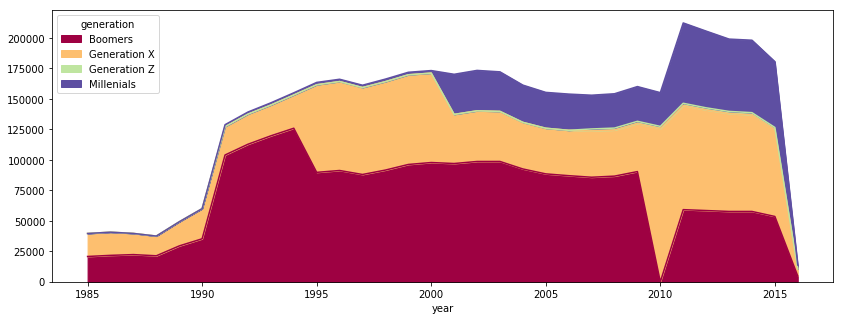

In [9]:
fig = plt.figure(figsize=(10, 8))

suicidal_no_by_year_generation = (df_area.groupby(['year', 'generation']).suicides_no.sum())*(100)/df_area.groupby(['year']).suicides_no.sum()
suicidal_no_by_year_generation.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(14, 5))

yearly_suicidal_generation = df_area.groupby(['year','generation']).suicides_no.sum()
yearly_suicidal_generation.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(14, 5) ) ;

<h1>Data Analysis & Results</h1>

To analyze the data, the data was first cleaned by dropping the unnecessary columns, the columns retained were year, suicide number, and generation. Next, the column themselves were narrowed to Boomers, Gen X, Millennials, and Gen Z. Finally missing value columns were dropped. To facilitate filtering statistics by generation and year the function year_sum was created, when year and generation are passed the result is the summation of the number of suicides for that year in the specified generation. 

To visualize the data a line graph was created to represent the number of suicides per year from the years 1985 - 2015 for the Boomer, Gen X, Millenial, and Gen Z generations. Our original question asked how the suicide rate changed over these generations and we hypothesised that there would be an increase in suicide rates in the generations moving forward. 

According to our data visualization our hypothesis is partly supported as Millenials do have a higher suicide rate in comparison to the Gen X generation. We can see this if we take for example the first year a Gen X person could be born (1961) and the earliest year a millennial could be born (1981) and look at the year they would turn 30, so 1991 for Gen X and 2011 for millenials. Our graph shows that during these years millennials have a higher suicide rate at around 70000 suicides per year while Gen X had around 21000 suicides per year. Therefore when it comes to the next generation following Gen X we do see an increase in suicide rates. To make sure that the results were not due to factors, we created a graph showing any correlation between year, sex, suidcide number and generation and there was none. The overall rate of suicide can be seen in the scatter plot created which showed an iverall increase in rate over time.    


<h1>Conclusion/ Discussion</h1>

In conclusion, suicide rates increased from Gen X to the Millennial generation. Although our hypothesis was that there would be an increase in suicide rates across the Boomer to Gen Z generations, our work uncovered an increase in rate of one generation to the next of one generation change. Our goal was to gain insight into changes in sucide rates across generations in order to best aid people in those particular generations. With our results we see that there was an increase in rate in Millenials. In the Millennial generation the oldest millennials are 38 years old as of 2019, and with this information we are able to potentially target people in this generation and tailor mental health programs and resources to this group. As for the rest of the groups although there was not a generational increase in rate, the visualization of rates gave us insight to periods of time people from the generations included see heightened rates and can be used to aid future generations at certain stages in life to help reduce the overall rate. Possible confounds that can result from this project include the issue that there may be an increase from generations but we are not able to see them , especially in the Gen Z case because we have less data to look due to the fact that they are the most recent generation and are in a younger stage of life. Overall our project has provided insight on generational differences in suicide rates and can help mental health professionals better understand how and which current genrational groups to look into when it comes to mental health resoures and thier presentation. 